In [1]:
import numpy as np
import pandas as pd

from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from biopsykit.utils.dataframe_handling import multi_xs


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from fau_colors import register_cmaps
register_cmaps()

sns.set_theme(context="paper", style="white", palette="faculties", font_scale=1.2)

%matplotlib widget

In [4]:
def conf_matrix(confusion_matrix):
    x = confusion_matrix.sum(axis=1)[:, np.newaxis]
    confusion_matrix /=x
    confusion_matrix *= 100
    confusion_matrix = round(confusion_matrix,2)
    return confusion_matrix

In [5]:
def get_best_params(param_list, mod, stage, optimization_metric = "mcc"):
    gridsearch_df = pd.read_csv(path.joinpath(algorithm +"_gridsearch_benchmark_" + mod + "_" + stage + ".csv"), index_col="Unnamed: 0").sort_values(by="mean_test_" + optimization_metric, ascending=False)
    gridsearch_df = gridsearch_df.reset_index(drop=True)
    param_list = ["param_" +param for param in param_list]
    return gridsearch_df[param_list].loc[0]

In [6]:
##### Fill in Algorithm here!! ####
algorithm = "mlp"
##### Fill in Algorithm here!! ####

In [7]:
# GridSearch Parameter: fill in here:
param_list = ["hidden_layer_sizes", "activation", "solver", "alpha", "learning_rate"]

In [8]:
path = Path.cwd().parents[2].joinpath("exports/results_per_algorithm/")
path = path.joinpath(algorithm)

# 5 Stage
# Acc only

In [9]:
stage = "5stage"
mod = "acc"

In [10]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [11]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [12]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.548360    0.098870
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.461050    0.100603
getup_latency              7.366071   25.749569
kappa                      0.275345    0.128407
mcc                        0.327487    0.136014
net_sleep_duration       723.812500  186.569817
precision                  0.432313    0.104859
recall                     0.548360    0.098870
sleep_efficiency          73.763471   15.782280
sleep_onset              114.093750   85.512515
sleep_onset_latency       46.758929   61.553833
specifity                  0.836658    0.070249
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   186.303571  135.400839
wake_onset              1037.910714  149.553929

In [13]:
confusion_matrix_acc = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc

,wake,n1,n2,n3,rem
wake,55451.0,3.0,25405.0,0.0,0.0
n1,7125.0,0.0,15977.0,0.0,0.0
n2,13302.0,0.0,79781.0,0.0,0.0
n3,941.0,0.0,16143.0,0.0,0.0
rem,2777.0,0.0,29043.0,0.0,0.0


In [14]:
get_best_params(param_list, mod=mod, stage=stage, optimization_metric="mcc")

param_hidden_layer_sizes      (100,)
param_activation                relu
param_solver                    adam
param_alpha                   0.0001
param_learning_rate         constant
Name: 0, dtype: object

# 5 Stage
# Acc + HRV

In [15]:
stage = "5stage"
mod = "acc_hrv"

In [16]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [17]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [18]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.561612    0.094699
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.487198    0.097169
getup_latency              6.281250   24.676315
kappa                      0.308497    0.119550
mcc                        0.355529    0.120647
net_sleep_duration       720.910714  189.489001
precision                  0.527210    0.105209
recall                     0.561612    0.094699
sleep_efficiency          73.465430   16.088347
sleep_onset              108.861607   86.043338
sleep_onset_latency       41.526786   59.097087
specifity                  0.844175    0.063877
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   195.375000  141.651795
wake_onset              1040.799107  148.722994

In [19]:
confusion_matrix_acc_hrv = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv

,wake,n1,n2,n3,rem
wake,56997.0,196.0,22420.0,29.0,1217.0
n1,6964.0,240.0,15092.0,15.0,791.0
n2,11954.0,233.0,78646.0,98.0,2152.0
n3,925.0,16.0,15804.0,39.0,300.0
rem,3342.0,139.0,25668.0,92.0,2579.0


In [20]:
get_best_params(param_list, mod=mod, stage=stage, optimization_metric="mcc")

param_hidden_layer_sizes      (100,)
param_activation                relu
param_solver                    adam
param_alpha                   0.0001
param_learning_rate         constant
Name: 0, dtype: object

# 5 Stage
# ACC + HRV + RRV

In [21]:
stage = "5stage"
mod = "acc_hrv_RRV"

In [22]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [23]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [24]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.614417    0.102007
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.556959    0.107765
getup_latency              8.718750   32.428969
kappa                      0.409022    0.132556
mcc                        0.443812    0.128378
net_sleep_duration       710.750000  190.654925
precision                  0.577403    0.102876
recall                     0.614417    0.102007
sleep_efficiency          72.576920   16.824919
sleep_onset              107.562500   84.886395
sleep_onset_latency       40.227679   57.271730
specifity                  0.864832    0.063540
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   203.955357  150.054244
wake_onset              1037.897321  149.315248

In [25]:
confusion_matrix_acc_hrv_rrv = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv_rrv

,wake,n1,n2,n3,rem
wake,60728.0,169.0,16072.0,10.0,3880.0
n1,7728.0,224.0,12135.0,9.0,3006.0
n2,10632.0,165.0,76086.0,22.0,6178.0
n3,526.0,5.0,15940.0,8.0,605.0
rem,3526.0,74.0,13887.0,1.0,14332.0


In [26]:
get_best_params(param_list, mod=mod, stage=stage, optimization_metric="mcc")

param_hidden_layer_sizes      (100,)
param_activation                relu
param_solver                    adam
param_alpha                     0.05
param_learning_rate         adaptive
Name: 0, dtype: object

# 5 Stage
# ACC + HRV + EDR

In [27]:
stage = "5stage"
mod = "acc_hrv_EDR"

In [28]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [29]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [30]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.573834    0.100719
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.510852    0.105865
getup_latency              7.718750   21.579271
kappa                      0.337467    0.126803
mcc                        0.376010    0.125278
net_sleep_duration       714.772321  195.145150
precision                  0.552990    0.105851
recall                     0.573834    0.100719
sleep_efficiency          72.875618   16.798606
sleep_onset              108.049107   88.397301
sleep_onset_latency       40.714286   61.351582
specifity                  0.845810    0.061407
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   202.419643  154.397143
wake_onset              1041.901786  148.320581

In [31]:
confusion_matrix_acc_hrv_edr = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv_edr

,wake,n1,n2,n3,rem
wake,58272.0,321.0,20351.0,55.0,1860.0
n1,6946.0,338.0,14010.0,22.0,1786.0
n2,11951.0,314.0,76169.0,405.0,4244.0
n3,1011.0,13.0,15020.0,227.0,813.0
rem,3764.0,180.0,21192.0,114.0,6570.0


In [32]:
get_best_params(param_list, mod=mod, stage=stage, optimization_metric="mcc")

param_hidden_layer_sizes      (100,)
param_activation                relu
param_solver                    adam
param_alpha                   0.0001
param_learning_rate         constant
Name: 0, dtype: object

/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93102/1399343355.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93102/1399343355.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93102/1399343355.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel

Text(0.5, 1.0, 'ACT + HRV + EDR')

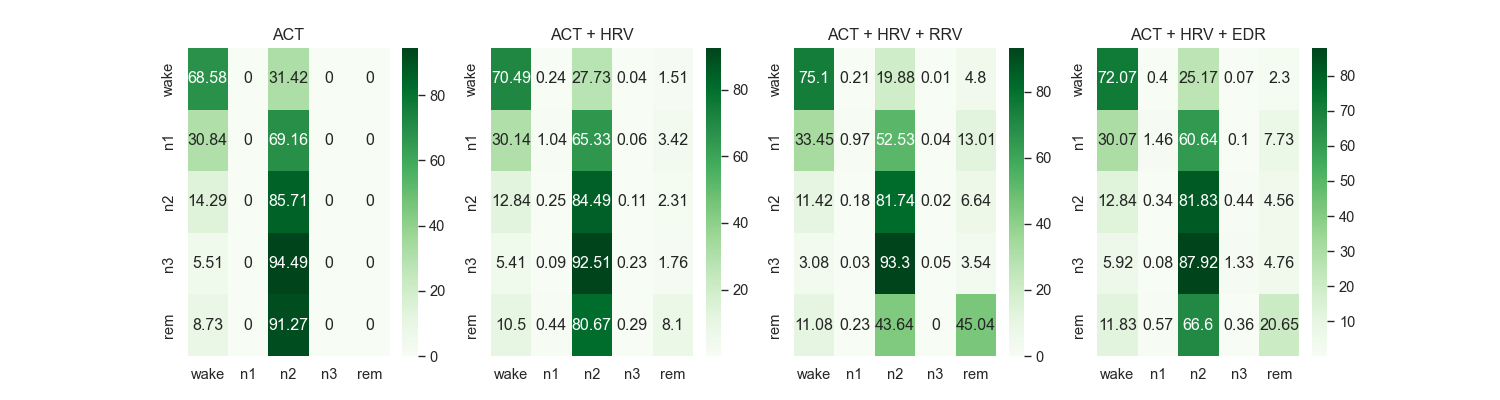

In [33]:
fig, axs = plt.subplots(ncols=4, figsize = (15,4))
sns.heatmap(conf_matrix(confusion_matrix_acc), fmt='g',annot=True, ax=axs[0], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv), fmt='g',annot=True, ax=axs[1], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv_rrv), fmt='g',annot=True, ax=axs[2], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv_edr), fmt='g',annot=True, ax=axs[3], cmap="Greens")
axs[0].set_title("ACT")
axs[1].set_title("ACT + HRV")
axs[2].set_title("ACT + HRV + RRV")
axs[3].set_title("ACT + HRV + EDR")

# 3 Stage
# Acc

In [34]:
stage = "3stage"
mod = "acc"

In [35]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [36]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [37]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.685649    0.092883
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.630050    0.096874
getup_latency              6.205357   23.963776
kappa                      0.365547    0.167875
mcc                        0.415696    0.167775
net_sleep_duration       793.870536  177.182322
precision                  0.628952    0.088298
recall                     0.685649    0.092883
sleep_efficiency          80.916547   13.886230
sleep_onset              105.812500   83.695747
sleep_onset_latency       38.477679   55.418825
specifity                  0.807762    0.112434
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   129.303571  122.809878
wake_onset              1040.084821  148.745929

In [38]:
confusion_matrix_acc = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc

,wake,nrem,rem
wake,48519.0,32333.0,7.0
nrem,12857.0,120412.0,0.0
rem,1272.0,30548.0,0.0


In [39]:
get_best_params(param_list, mod=mod, stage=stage, optimization_metric="mcc")

param_hidden_layer_sizes      (100,)
param_activation                relu
param_solver                    adam
param_alpha                   0.0001
param_learning_rate         adaptive
Name: 0, dtype: object

# 3 Stage
# Acc + HRV

In [40]:
stage = "3stage"
mod = "acc_hrv"

In [41]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [42]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [43]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.696422    0.089942
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.647083    0.094848
getup_latency              5.343750   21.558402
kappa                      0.399273    0.155340
mcc                        0.443041    0.149725
net_sleep_duration       772.218750  175.436730
precision                  0.688197    0.090021
recall                     0.696422    0.089942
sleep_efficiency          78.724454   14.001532
sleep_onset              101.169643   79.554070
sleep_onset_latency       33.834821   46.823727
specifity                  0.812027    0.096684
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   153.910714  124.416922
wake_onset              1042.236607  148.144707

In [44]:
confusion_matrix_acc_hrv = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv

,wake,nrem,rem
wake,52039.0,28487.0,333.0
nrem,13802.0,118815.0,652.0
rem,1968.0,29115.0,737.0


In [45]:
get_best_params(param_list, mod=mod, stage=stage, optimization_metric="mcc")

param_hidden_layer_sizes      (100,)
param_activation                relu
param_solver                    adam
param_alpha                   0.0001
param_learning_rate         constant
Name: 0, dtype: object

# 3 Stage
# Acc + HRV + RRV

In [46]:
stage = "3stage"
mod = "acc_hrv_RRV"

In [47]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [48]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [49]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.739467    0.091793
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.724707    0.093957
getup_latency              5.053571   21.016047
kappa                      0.516505    0.149020
mcc                        0.541585    0.139593
net_sleep_duration       777.111607  168.010920
precision                  0.765701    0.071055
recall                     0.739467    0.091793
sleep_efficiency          79.324347   13.464264
sleep_onset               97.901786   79.800981
sleep_onset_latency       30.566964   48.951655
specifity                  0.826593    0.084424
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   152.285714  125.287682
wake_onset              1043.169643  148.508875

In [50]:
confusion_matrix_acc_hrv_rrv = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv_rrv

,wake,nrem,rem
wake,54302.0,23800.0,2757.0
nrem,10876.0,115369.0,7024.0
rem,1875.0,17534.0,12411.0


In [51]:
get_best_params(param_list, mod=mod, stage=stage, optimization_metric="mcc")

param_hidden_layer_sizes      (100,)
param_activation                relu
param_solver                    adam
param_alpha                   0.0001
param_learning_rate         constant
Name: 0, dtype: object

# 3 Stage
# Acc + HRV + EDR

In [52]:
stage = "3stage"
mod = "acc_hrv_EDR"

In [53]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [54]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [55]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.702651    0.091604
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.660152    0.098217
getup_latency              6.808036   19.770743
kappa                      0.420158    0.153851
mcc                        0.459784    0.147302
net_sleep_duration       763.250000  184.369803
precision                  0.699594    0.096060
recall                     0.702651    0.091604
sleep_efficiency          77.843779   15.077440
sleep_onset              106.049107   82.829190
sleep_onset_latency       38.714286   54.692033
specifity                  0.814194    0.093129
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   160.075893  141.556874
wake_onset              1042.812500  148.421623

In [56]:
confusion_matrix_acc_hrv_edr = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv_edr

,wake,nrem,rem
wake,53608.0,26715.0,536.0
nrem,14305.0,117121.0,1843.0
rem,2324.0,27020.0,2476.0


In [57]:
get_best_params(param_list, mod=mod, stage=stage, optimization_metric="mcc")

param_hidden_layer_sizes      (100,)
param_activation                relu
param_solver                    adam
param_alpha                     0.05
param_learning_rate         adaptive
Name: 0, dtype: object

/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93102/1399343355.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93102/1399343355.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93102/1399343355.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel

Text(0.5, 1.0, 'ACT + HRV + EDR')

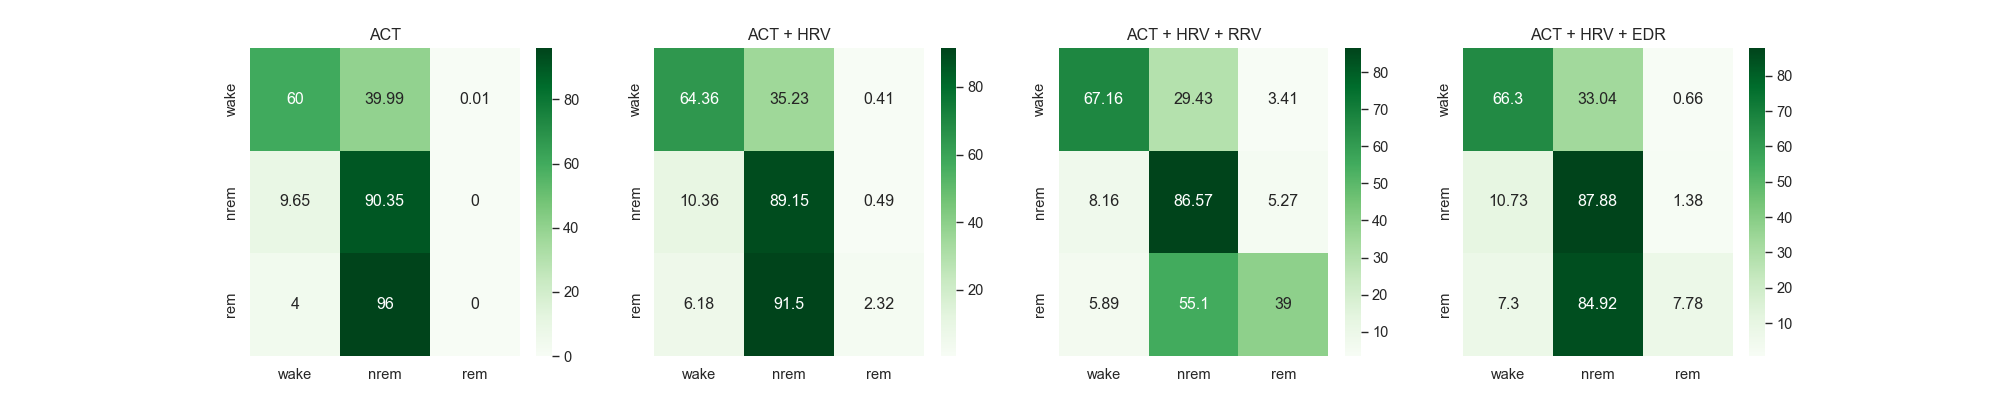

In [58]:
fig, axs = plt.subplots(ncols=4, figsize = (20,4))
sns.heatmap(conf_matrix(confusion_matrix_acc), fmt='g',annot=True, ax=axs[0], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv), fmt='g',annot=True, ax=axs[1], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv_rrv), fmt='g',annot=True, ax=axs[2], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv_edr), fmt='g',annot=True, ax=axs[3], cmap="Greens")
axs[0].set_title("ACT")
axs[1].set_title("ACT + HRV")
axs[2].set_title("ACT + HRV + RRV")
axs[3].set_title("ACT + HRV + EDR")

# Binary
# Acc only

In [59]:
stage = "binary"
mod = "acc"

In [60]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [61]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [62]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.810858    0.104981
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.858851    0.095503
getup_latency              5.959821   22.827550
kappa                      0.519781    0.223637
mcc                        0.549508    0.212699
net_sleep_duration       806.580357  173.512649
precision                  0.818551    0.113678
recall                     0.918692    0.110077
sleep_efficiency          82.218407   13.299510
sleep_onset              102.883929   82.511882
sleep_onset_latency       35.549107   50.993249
specifity                  0.573810    0.213360
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   120.973214  119.175453
wake_onset              1040.500000  148.713738

In [63]:
confusion_matrix_acc = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc

,wake,sleep
wake,46949.0,33910.0
sleep,12481.0,152608.0


In [64]:
get_best_params(param_list, mod=mod, stage=stage, optimization_metric="accuracy")

param_hidden_layer_sizes      (100,)
param_activation                relu
param_solver                    adam
param_alpha                   0.0001
param_learning_rate         adaptive
Name: 0, dtype: object

# Binary
# Acc + HRV

In [65]:
stage = "binary"
mod = "acc_hrv"

In [66]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [67]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [68]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.819181    0.101189
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.863366    0.093251
getup_latency              4.732143   20.458635
kappa                      0.550874    0.206491
mcc                        0.577878    0.192740
net_sleep_duration       788.678571  172.854703
precision                  0.832757    0.113761
recall                     0.912880    0.110475
sleep_efficiency          80.425281   13.619610
sleep_onset              100.308036   82.164653
sleep_onset_latency       32.973214   50.671006
specifity                  0.619542    0.210675
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   139.986607  124.182113
wake_onset              1042.910714  147.984216

In [69]:
confusion_matrix_acc_hrv = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv

,wake,sleep
wake,50164.0,30695.0
sleep,13606.0,151483.0


In [70]:
get_best_params(param_list, mod=mod, stage=stage, optimization_metric="accuracy")

param_hidden_layer_sizes      (100,)
param_activation                relu
param_solver                    adam
param_alpha                   0.0001
param_learning_rate         adaptive
Name: 0, dtype: object

# Binary
# Acc + HRV + RRV

In [71]:
stage = "binary"
mod = "acc_hrv_RRV"

In [72]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [73]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [74]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.840015    0.095285
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.875723    0.095800
getup_latency              4.781250   19.913972
kappa                      0.610337    0.186932
mcc                        0.632865    0.170151
net_sleep_duration       771.517857  173.836580
precision                  0.854803    0.106216
recall                     0.914264    0.117937
sleep_efficiency          78.767903   14.315445
sleep_onset               98.790179   79.922528
sleep_onset_latency       31.455357   47.072578
specifity                  0.682318    0.190789
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   157.093750  134.200423
wake_onset              1043.312500  148.174393

In [75]:
confusion_matrix_acc_hrv_rrv = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv_rrv

,wake,sleep
wake,55145.0,25714.0
sleep,13482.0,151607.0


In [76]:
get_best_params(param_list, mod=mod, stage=stage, optimization_metric="accuracy")

param_hidden_layer_sizes      (100,)
param_activation                relu
param_solver                    adam
param_alpha                   0.0001
param_learning_rate         constant
Name: 0, dtype: object

# Binary
# Acc + HRV + EDR

In [77]:
stage = "binary"
mod = "acc_hrv_EDR"

In [78]:
full_results = pd.read_csv(path.joinpath(algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [79]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [80]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.823804    0.099221
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.865590    0.093087
getup_latency              6.263393   19.671000
kappa                      0.565377    0.200510
mcc                        0.591732    0.185652
net_sleep_duration       781.821429  177.403885
precision                  0.840117    0.110714
recall                     0.910415    0.115796
sleep_efficiency          79.726558   14.170049
sleep_onset              100.973214   82.232358
sleep_onset_latency       33.638393   48.192612
specifity                  0.639180    0.207859
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   146.714286  132.391587
wake_onset              1043.357143  148.252110

In [81]:
confusion_matrix_acc_hrv_edr = pd.read_csv(path.joinpath("confusion_matrix_" + algorithm +"_benchmark_" + mod + "_" + stage + ".csv"), index_col = "Unnamed: 0")
confusion_matrix_acc_hrv_edr

,wake,sleep
wake,51724.0,29135.0
sleep,14012.0,151077.0


In [82]:
get_best_params(param_list, mod=mod, stage=stage, optimization_metric="accuracy")

param_hidden_layer_sizes      (100,)
param_activation                relu
param_solver                    adam
param_alpha                   0.0001
param_learning_rate         constant
Name: 0, dtype: object

/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93102/1399343355.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93102/1399343355.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_93102/1399343355.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel

Text(0.5, 1.0, 'ACT + HRV + EDR')

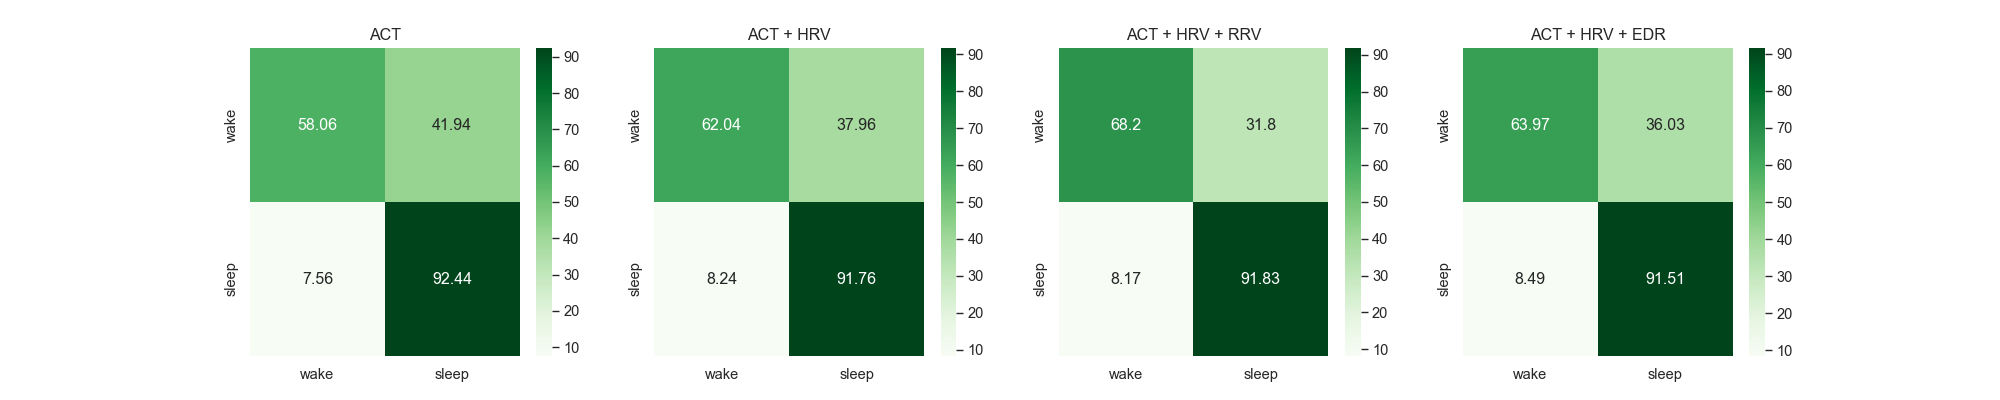

In [83]:
fig, axs = plt.subplots(ncols=4, figsize = (20,4))
sns.heatmap(conf_matrix(confusion_matrix_acc), fmt='g',annot=True, ax=axs[0], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv), fmt='g',annot=True, ax=axs[1], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv_rrv), fmt='g',annot=True, ax=axs[2], cmap="Greens")
sns.heatmap(conf_matrix(confusion_matrix_acc_hrv_edr), fmt='g',annot=True, ax=axs[3], cmap="Greens")
axs[0].set_title("ACT")
axs[1].set_title("ACT + HRV")
axs[2].set_title("ACT + HRV + RRV")
axs[3].set_title("ACT + HRV + EDR")